In [1]:
import gensim
from gensim.models import KeyedVectors
import collections
from collections import OrderedDict
import os



In [2]:
path = '/home/ayan-yue/Documents/projects/dynamic-word-embeddings/diachronic-models/'

In [3]:
dyn_vec = OrderedDict()
t = 19

for i in range(t):
    for file in os.listdir(path):
        filename = os.path.join(path, file)
        if os.path.basename(filename).split('.')[0][1:] == str(i):
            dyn_vec['t{0}'.format(i)] = KeyedVectors.load(filename)
    
    

In [4]:
import pickle

with open('pickled_d', 'rb') as fp:
    d = pickle.load(fp)


In [5]:
for key in d:
    d[key] = d[key].split(' ')
    

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

def vocab_search(string):
    
    slices = []
    for key in d:
        for i in range(len(d[key])):
            if d[key][i] == string:
                slices.append(key)
                break
    
    return slices
            

In [7]:
#list(G.adjacency()) to analyze graph

def graph(query, cosine_similarity_threshold, path):
    
    m = vocab_search(query)
    for i in range(len(m)):
        
        #construct graph
        G = nx.Graph()
        nodes = dyn_vec[m[i]].most_similar(query)
        for j in range(len(nodes)):
            cos_sim = dyn_vec[m[i]].similarity(query, nodes[j][0])
            G.add_edge(query, nodes[j][0], weight=cos_sim)
            for k in range(len(nodes)):
                cos_sim = dyn_vec[m[i]].similarity(nodes[j][0], nodes[k][0])
                G.add_edge(nodes[j][0], nodes[k][0], weight=cos_sim)
                G.remove_edges_from(G.selfloop_edges())
                
        #visualise
        fig = plt.figure()
        
        #figure size
        plt.rcParams['figure.figsize'] = [20, 15]
        
        elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > cosine_similarity_threshold]
        esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= cosine_similarity_threshold]
        query_node = [node for node in G.nodes() if node == query]
        other_nodes = [node for node in G.nodes() if node != query]

        pos = nx.spring_layout(G)
        
        #nodes
        nx.draw_networkx_nodes(G, pos, nodelist=query_node, cmap=plt.get_cmap('hsv'), node_color='lime', node_size = 800)
        nx.draw_networkx_nodes(G, pos, nodelist=other_nodes, cmap=plt.get_cmap('hsv'), node_color='lavender', node_size = 800)
        
        #edges
        nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2, edge_color='lavender' )
        nx.draw_networkx_edges(G, pos, edgelist=esmall, width=2, alpha=0, edge_color='b', style='dashed')
        
        #labels
        nx.draw_networkx_labels(G, pos, font_size=20)
        
        #titles
        plt.title(str(2001+i) + '\n' + 'cosine similarity threshold: ' + str(cosine_similarity_threshold), fontsize=25)
        
        #save
        if not os.path.exists(path):
            os.makedirs(path)
        
        fig.savefig(path + 't' + str(i) + '.png')
        
        
     
    

/home/ayan-yue/Documents/projects/env1/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/home/ayan-yue/Documents/projects/env1/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if sys.path[0] == '':
/home/ayan-yue/Documents/projects/env1/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  from ipykernel import kernelapp as app


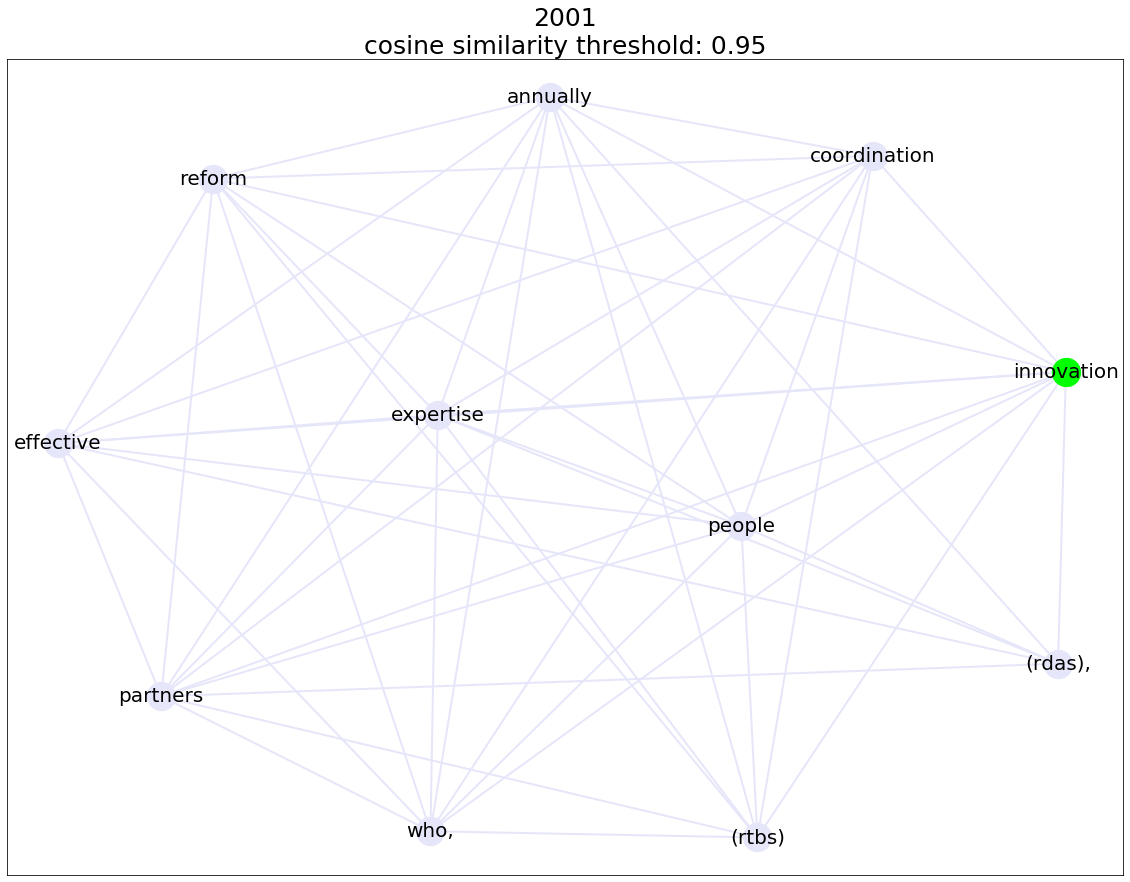

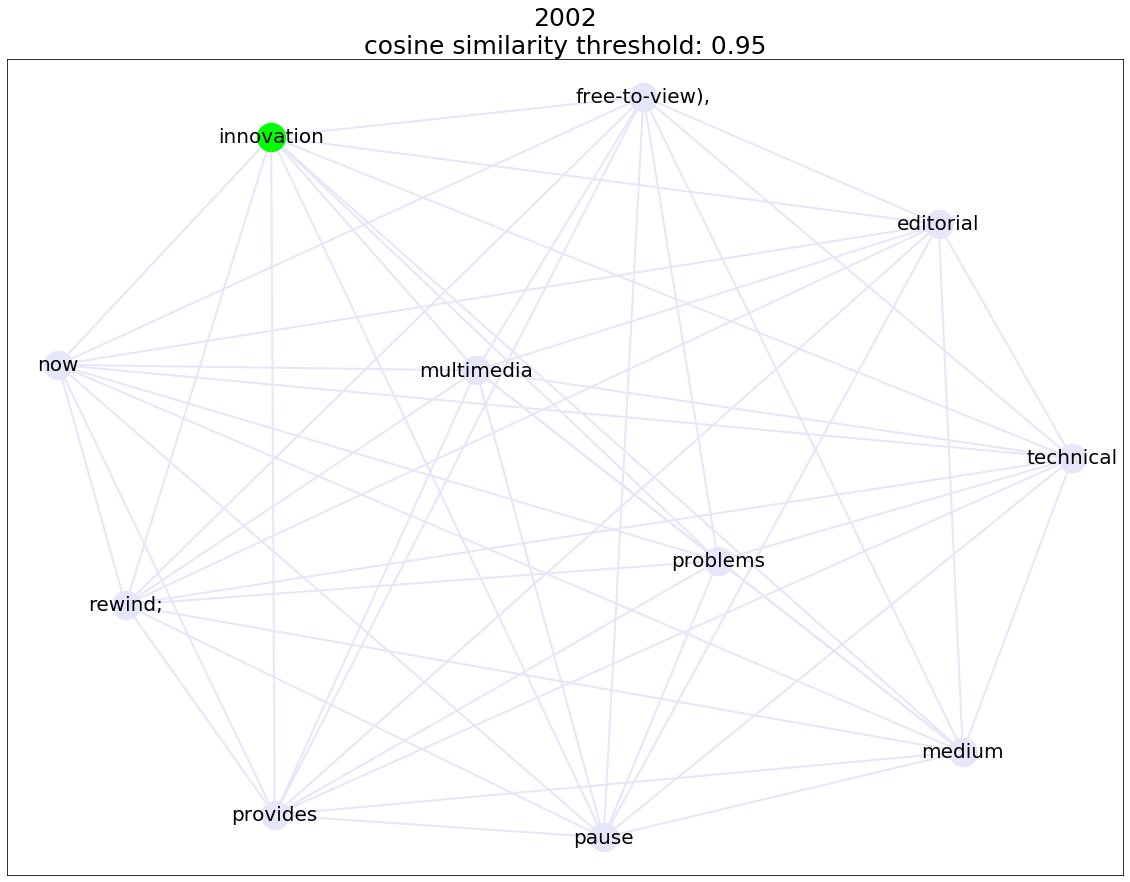

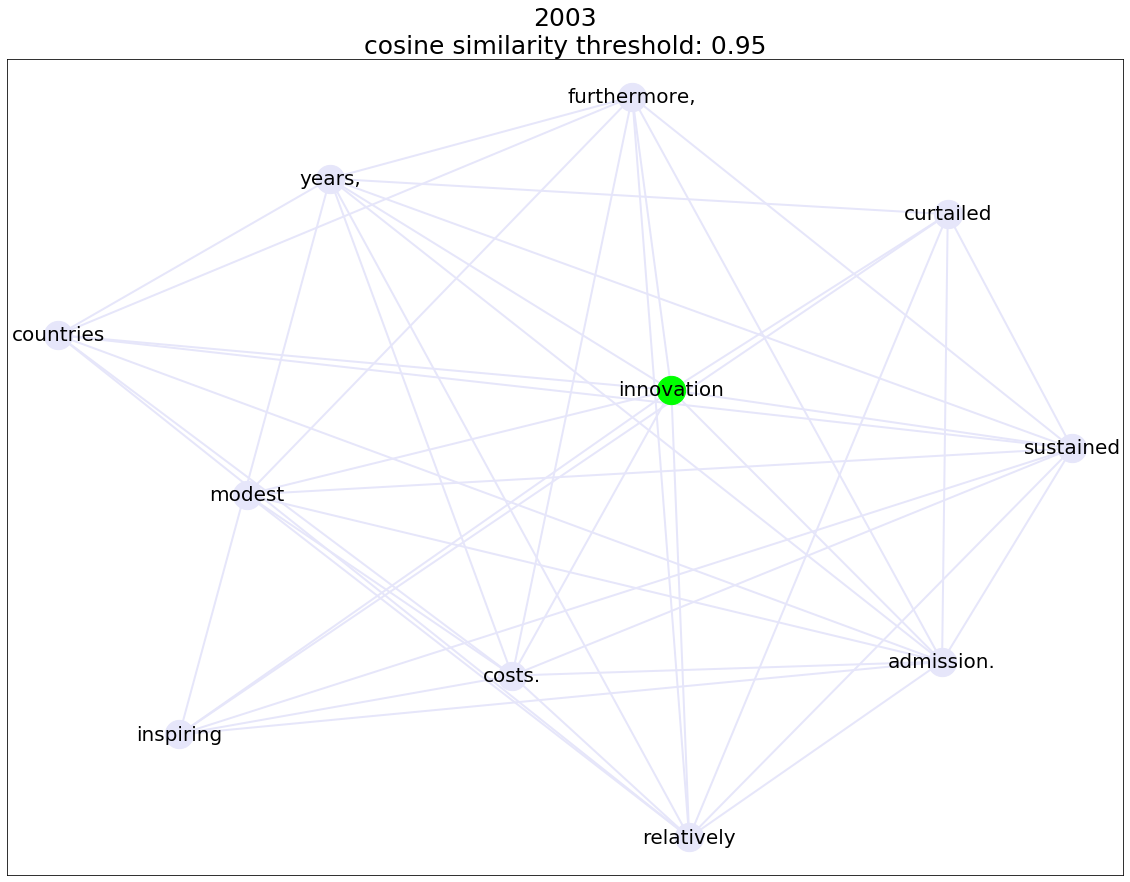

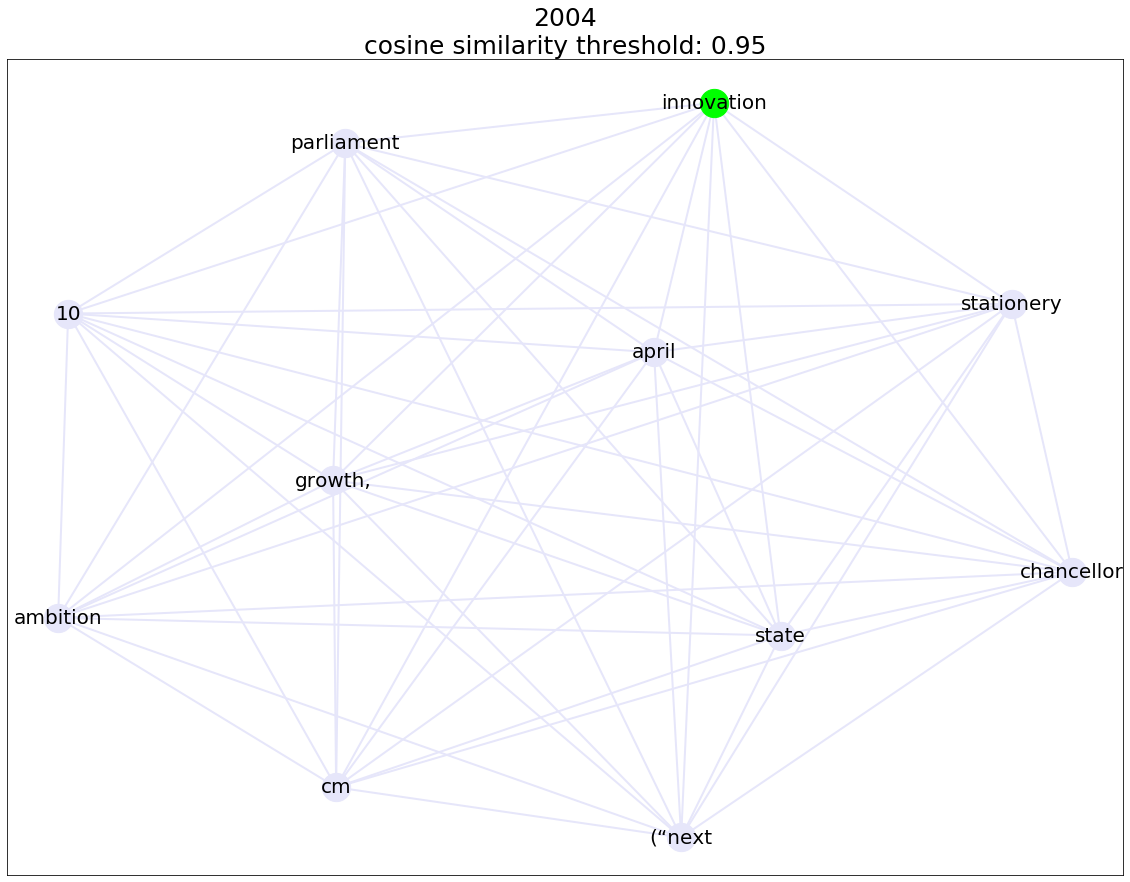

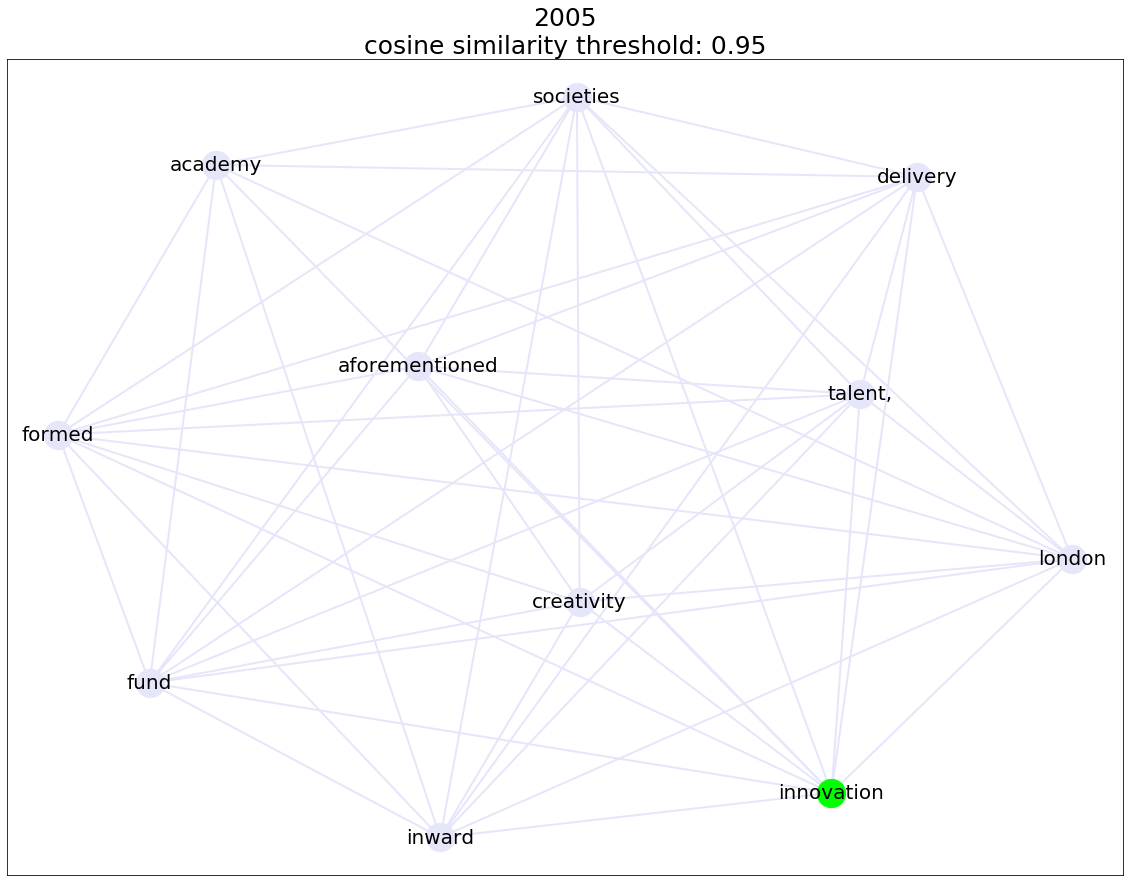

In [9]:
path = '/home/ayan-yue/Documents/projects/dynamic-word-embeddings/graphs/innovation/'
graph('innovation', 0.95, path)